In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
#import os
#print(os.getcwd())
val_money=pd.read_csv("VALUE_OF_MONEY.csv")
print(val_money.head())
X_train, X_test, y_train, y_test = train_test_split(val_money[['YEAR']],val_money.VALUE_OF_MONEY,test_size=0.20, random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

   YEAR  VALUE_OF_MONEY
0  1958          100.00
1  1959          105.15
2  1960          109.60
3  1961          109.60
4  1962          113.11
(49, 1) (49,) (13, 1) (13,)


In [2]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train) 
predictions= clf.predict(X_test)
predictions

array([ 3676.98237353,  4276.59034662, -1319.75073557,  4376.52500881,
        -820.07742466,  3477.11304917,   279.20385934,  -120.53478938,
        1178.61581898,  4576.39433317,  1678.28912989,  -420.33877593,
        3377.17838699])

In [17]:
from sklearn.linear_model import LinearRegression
model=reg = LinearRegression()
reg.fit(X_train, y_train)
pred=reg.predict(X_test)

In [4]:
#gradient boosting regression
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clfg = ensemble.GradientBoostingRegressor(**params)
clfg.fit(X_train, y_train)
predg=clfg.predict(X_test)

D:\Abhishek\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
print(predg)
print(y_test)

[3114.09426977 5361.73879519  120.49419605 6585.38857352  124.28839902
 3114.09426977  236.36679673  197.34753323  505.01064964 6585.38857352
  749.57099133  163.4159802  2667.98773406]
50    3296.08
56    5878.83
0      100.00
57    6223.20
5      115.93
48    2932.45
16     281.26
12     191.57
25     537.70
59    6764.34
30     813.58
9      174.24
47    2777.83
Name: VALUE_OF_MONEY, dtype: float64


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
RandomForestRegressor()
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
modelr=regr.fit(X_train, y_train)
print(regr.predict(X_test))

D:\Abhishek\anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[4587.18950786 4587.18950786 4587.18950786 4587.18950786 4587.18950786
 4587.18950786]


In [7]:
from sklearn import linear_model
clfi = linear_model.Lasso(alpha=0.1)
clfi.fit(X_train, y_train)
print(clfi.predict(X_test))

[ 3677.11621161  4276.76462498 -1319.95389984  4376.70602721
  -820.2468887   3477.23340715   279.10853582  -120.65707309
  1178.58115588  4576.58883167  1678.28816703  -420.48127978
  3377.29200492]


In [8]:
d={'Ridge': [clf.score(X_train,y_train), clf.score(X_test,y_test)] ,'Linear': [clfg.score(X_train,y_train), reg.score(X_test,y_test)], 'XGBoost': [clfg.score(X_train,y_train), clfg.score(X_test,y_test)] ,'RandomForest':[regr.score(X_train,y_train), regr.score(X_test,y_test)] ,'Lasso':[clfi.score(X_train,y_train), clfi.score(X_test,y_test)]}

scoresu  = pd.DataFrame(data=d)
scoresu=scoresu.rename({0: 'TRAIN', 1: 'TEST'})
print(scoresu)

          Ridge    Linear   XGBoost  RandomForest     Lasso
TRAIN  0.777600  0.999954  0.999954      0.980355  0.777600
TEST   0.793255  0.793263  0.993353      0.981103  0.793263


In [9]:
clfg.predict(2020)

array([7365.28131406])

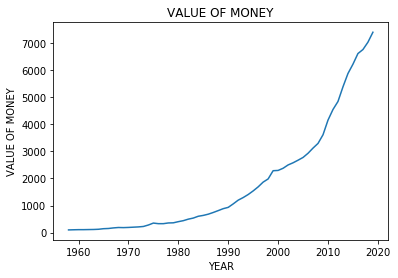

In [43]:
import matplotlib.pyplot as plt
plt.xlabel('YEAR')
plt.ylabel('VALUE OF MONEY')
plt.title('VALUE OF MONEY')
x = val_money['YEAR']
y = val_money['VALUE_OF_MONEY']
plt.plot(x,y)
plt.show()

In [32]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array(val_money[['YEAR']])
y = np.array(val_money[['VALUE_OF_MONEY']])
kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)  
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X[train_index]
    X_test =  X[test_index]
    y_train, y_test = y[train_index], y[test_index]
print(X_train)
print(y_train)

KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61] TEST: [0 1 2 3 4 5 6]
TRAIN: [ 0  1  2  3  4  5  6 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61] TEST: [ 7  8  9 10 11 12 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61] TEST: [14 15 16 17 18 19]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61] TEST: [20 21 22 23 24 25]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47

In [30]:
model.predict(2019)

array([4776.48235953])

In [29]:
y_test

array([[5878.83],
       [6223.2 ],
       [6616.76],
       [6764.34],
       [7034.92],
       [7403.89]])

In [13]:
clfg.predict(2025)

array([7365.28131406])

In [14]:
clfg.predict(2020)

array([7365.28131406])

In [15]:
clfg.predict(2019)

array([7365.28131406])

In [16]:
clfg.predict(2018)

array([6999.91776573])

In [33]:
modelr=regr.fit(X_train, y_train)

D:\Abhishek\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [37]:
modelr.predict(2020)

array([4587.18950786])

In [42]:

#y_train = column_or_1d(y_train, warn=True)
modelg=clfg.fit(X_train, y_train)

D:\Abhishek\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
modelg.predict(2019)

array([5359.78970271])